# Correlation Length Analysis

Measurement of spatial correlations and correlation length in disordered systems. Studies how correlations decay with distance and diverge near critical points.

## 05- Tool Hambastegi

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [ ]:
def light_up(grid, p, L):
    random.random()
    lights = 0
    for i in range(0, L):
        for j in range(0, L):
            if j == 0:
                grid[i][j] = 1
                lights += 1
            elif random.random() <= p:
                grid[i][j] = 1
                lights += 1
            else:
                grid[i][j] = 0 
    return grid, lights

In [ ]:
#define a function which do the algorithm 
def HK(L, p):
    grid = np.zeros((L, L))
    grid, lights = light_up(grid, p, L)
    
    #خانه های مقدار گرفته را در خود ذخیره می کند
    l = [0]
    #the color of each cell
    color = 1
    #size of khooshe
    s = [0]

    #first j... because we want to explore from top to bottom and then left to right...
    for j in range(0, L):
        for i in range(0, L):
            if grid[i, j] == 1:
                if (i==0 and j==0) or (i==0 and grid[i, j-1]==0) or (j==0 and grid[i-1, j]==0) or (grid[i-1, j]==0 and grid[i, j-1]==0):
                    grid[i, j] = color
                    l.append(color)
                    s.append(1)
                    color += 1

                elif i == 0 and grid[i, j-1] != 0:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1

                elif j == 0 and grid[i-1, j] != 0:
                    grid[i, j] = grid[i-1, j]
                    s[l[int(grid[i-1, j])]] +=1

                elif grid[i, j-1]==0 and grid[i-1, j]!=0:
                    grid[i, j] = grid[i-1, j]
                    s[l[int(grid[i-1, j])]] += 1

                elif grid[i, j-1] != 0 and grid[i-1, j]==0:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1

                else:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1
                    if l[int(grid[i-1, j])] != l[int(grid[i, j-1])]:
                        s[l[int(grid[i, j-1])]] += s[l[int(grid[i-1, j])]]
                        s[l[int(grid[i-1, j])]] = 0
                    measure = l[int(grid[i-1, j])]
                    for r in range(len(l)):
                        if l[r] == measure:
                            l[r] = l[int(grid[i, j-1])]


    for j in range(0, L):
        for i in range(0, L):
            if grid[i, j] != 0:
                index = int(grid[i, j])
                grid[i, j] = l[index]


    return grid, l, s


In [ ]:
grid, l, s = HK(10, 0.7)

print(grid, l, s)

s[l[int(grid[0, 0])]] -= 10

print(s[l[int(grid[0, 0])]])
Si = 0
x = 0
for i in range(10):
  if grid[i, 9] == grid[0, 0]:
    s[l[int(grid[0, 0])]] = 0
    # for j in l:
    #   if s[j] >= Si and l[j] != grid[i, 9]:
    #     print(grid[i, 9])
    #     Si = s[j]
    #   x = 1
    #   break
Si = np.max(s)    
 
print(Si)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 3. 0. 0. 0. 0. 0.]
 [1. 1. 0. 2. 0. 0. 0. 2. 0. 0.]
 [1. 1. 0. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 0. 2. 2. 2. 2. 2. 2. 2.]] [0, 1, 2, 3, 2, 1] [0, 52, 16, 1, 0, 0]
42
16


## 05-Tool Hambastegi

[[0.00000e+00 1.43000e+00 2.06000e+00 3.37000e+00 4.37000e+00 5.89000e+00
  7.38000e+00 9.54000e+00 1.25400e+01 1.56400e+01 1.77100e+01 1.55300e+01
  1.48100e+01 6.99000e+00 4.24000e+00 2.06000e+00 7.30000e-01 2.70000e-01
  1.00000e-01 1.00000e-02 0.00000e+00]
 [0.00000e+00 2.16000e+00 3.48000e+00 5.52000e+00 7.14000e+00 1.00400e+01
  1.32400e+01 1.85000e+01 2.44900e+01 3.98700e+01 5.67600e+01 7.47400e+01
  5.47800e+01 2.85500e+01 1.33200e+01 2.92000e+00 1.07000e+00 2.20000e-01
  3.00000e-02 0.00000e+00 0.00000e+00]
 [0.00000e+00 3.18000e+00 5.35000e+00 7.89000e+00 1.18700e+01 1.67300e+01
  2.30900e+01 3.28600e+01 4.54400e+01 7.43100e+01 1.35710e+02 2.39060e+02
  2.00180e+02 4.73200e+01 1.03700e+01 4.95000e+00 1.97000e+00 9.50000e-01
  2.60000e-01 4.00000e-02 0.00000e+00]
 [0.00000e+00 4.89000e+00 9.55000e+00 1.51800e+01 2.20300e+01 3.11700e+01
  4.29300e+01 5.97100e+01 8.74600e+01 1.40760e+02 2.67420e+02 6.67920e+02
  8.59190e+02 6.37500e+01 1.65500e+01 7.12000e+00 3.49000e+00 1.58000

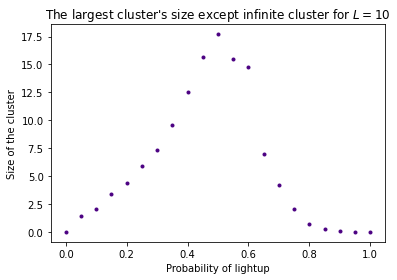

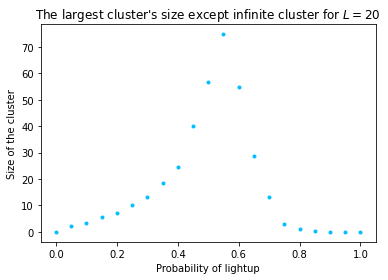

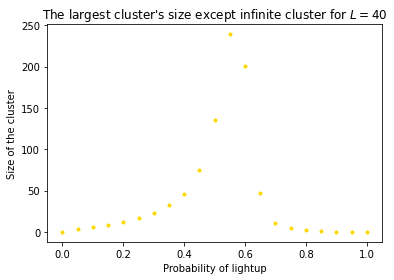

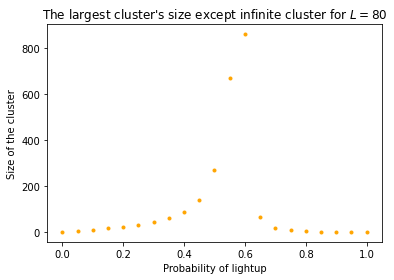

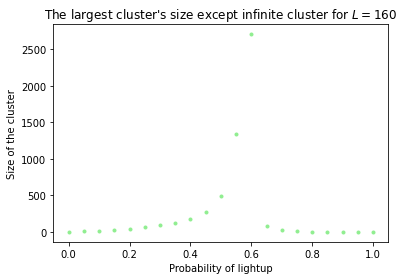

CPU times: user 26min 47s, sys: 219 ms, total: 26min 47s
Wall time: 26min 48s


In [ ]:
%%time

color = ['indigo', 'deepskyblue', 'gold', 'orange', 'lightgreen']

L = [10, 20, 40, 80, 160]
# L = [10, 20]
l_size = np.size(L)

P = np.arange(0, 105, 5)
p_size = np.size(P)

Si = np.zeros(100)
Si_l = np.zeros((l_size, p_size))

for l in range(l_size):
    for k in range(p_size):
        Si_l[l, k] = 0
        for m in range(100):
            Si[m] = 0
            Latt, ls, s = HK(L[l], P[k]/100)

            s[ls[int(Latt[0, 0])]] -= L[l]

            for i in range(L[l]):
              if Latt[i, (L[l]-1)] in Latt[:, 0]:
                s[ls[int(grid[0, 0])]] = 0
                break        
            Si[m] = np.max(s)    
 

        Si_l[l, k] = np.mean(Si[:])

    
    F = plt.figure()
    F = plt.plot(P/100, Si_l[l,:], '.', c = color[l])
    plt.title("The largest cluster's size except infinite cluster for $L={}$".format(L[l]))
    plt.ylabel('Size of the cluster')
    plt.xlabel('Probability of lightup')
    plt.savefig('CSL{}.png'.format(L[l]))

print(Si_l)
plt.show()

## 06-Namaye Bohrani


In [37]:
%%time

# color = ['indigo', 'deepskyblue', 'gold', 'orange', 'lightgreen']

L = [10, 20, 40, 80, 160]
# L = [10, 20]
l_size = np.size(L)

P = np.arange(52, 60, 0.1)
p_size = np.size(P)

Si = np.zeros(100)
Si_l = np.zeros((l_size, p_size))

for l in range(l_size):
    for k in range(p_size):
        Si_l[l, k] = 0
        for m in range(100):
            Si[m] = 0
            Latt, ls, s = HK(L[l], P[k]/100)

            s[ls[int(Latt[0, 0])]] -= L[l]

            for i in range(L[l]):
              if Latt[i, (L[l]-1)] in Latt[:, 0]:
                s[ls[int(grid[0, 0])]] = 0
                break        
            Si[m] = np.max(s)    
 

        Si_l[l, k] = np.mean(Si[:])

 


CPU times: user 1h 15min 28s, sys: 510 ms, total: 1h 15min 29s
Wall time: 1h 15min 33s


In [38]:
print(Si_l)

[[  17.8    16.05   15.98   15.44   16.48   17.41   16.92   18.45   17.9
    17.74   17.57   19.88   18.07   18.65   16.59   17.7    17.44   17.78
    16.29   15.32   17.79   18.84   16.34   17.81   17.89   17.5    15.56
    15.67   15.     15.09   16.88   18.06   15.96   16.73   18.45   16.64
    16.98   18.46   16.11   18.61   16.79   15.91   17.62   17.67   16.95
    16.6    14.77   14.83   14.2    15.95   19.14   16.84   15.8    15.22
    15.14   14.15   15.2    15.01   14.3    15.37   12.98   14.97   15.86
    15.17   14.03   15.82   11.88   15.01   15.19   13.66   12.56   15.62
    14.5    15.39   16.06   16.67   13.9    12.49   13.63   13.76]
 [  65.09   62.89   61.73   67.8    62.74   71.98   67.14   60.87   63.57
    60.3    69.01   66.93   67.68   67.01   63.1    66.58   70.25   70.18
    66.12   68.43   64.05   62.67   65.96   61.26   69.66   66.3    64.01
    65.48   65.02   64.52   69.09   64.73   70.88   68.68   70.34   66.71
    69.96   72.44   67.18   69.07   71.08   69

In [39]:
def maxyab(a):
  for i in range(np.size(a)):
    if a[i] == np.max(a):
      return i , a[i]

In [40]:
maxyab([1, 2, 3, 4, 10, 1])

(4, 10)

In [44]:
xi = []
pi = []

for l in range(l_size):
  x, y = maxyab(Si_l[l, :])
  xi = np.append(xi, y)
  pi = np.append(pi, x)

print(xi, pi)

[  19.88   76.4   304.35 1060.83 4038.07] [11. 65. 53. 61. 69.]


In [48]:
dp = -(0.52 + pi * 0.001 - 0.5927)
dp

array([0.0617, 0.0077, 0.0197, 0.0117, 0.0037])

In [52]:
mu = np.polyfit(np.log10(L), np.log10(dp), 1)
nu = -1/mu[0]

print('\u03BD ={}'.format(nu))

ν =1.3305359350790402


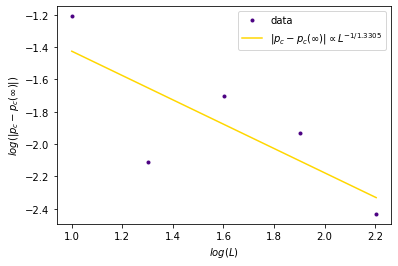

In [64]:
plt.plot(np.log10(L), np.log10(dp), '.', c = 'indigo', label = 'data')
plt.plot(np.log10(L), mu[0] * np.log10(L) + mu[1], c = 'gold', label ='$|p_c-p_c(\infty)|\propto L^{-1/1.3305}$')
plt.legend()
plt.xlabel('$log(L)$')
plt.ylabel('$log(|p_c-p_c(\infty)|)$')
plt.savefig('nu.png')
plt.show()